In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")

In [6]:
import pandas as pd
from src.dataset import DatasetProcessor


In [8]:
dp = DatasetProcessor("dataset.csv")
dp

DatasetProcessor(file_path=dataset.csv), train=(115977, 15), test=(5253, 15)

In [3]:
from src.epl_player_data_utils import EPLPlayerData

epl_player_data = EPLPlayerData("../SampleData/players.json")
epl_player_data

EPLPlayerData(../SampleData/players.json): 804 players

In [4]:
epl_player_data.get_player_info(37572)

{'playerId': 277441,
 'info': {'position': 'F', 'shirtNum': 19, 'positionInfo': 'Centre Striker'},
 'nationalTeam': {'isoCode': 'AR', 'country': 'Argentina'},
 'previousTeam': {'name': 'FC Barcelona',
  'club': {'name': 'Barcelona', 'abbr': 'BCN', 'id': 49},
  'teamType': 'FIRST',
  'shortName': 'FC Barcelona',
  'id': 49,
  'altIds': {'opta': 't178'}},
 'birth': {'date': {'millis': 581212800000, 'label': '2 June 1988'},
  'country': {'isoCode': 'AR', 'country': 'Argentina'},
  'place': 'Buenos Aires'},
 'age': '36 years 82 days',
 'name': {'display': 'Sergio Agüero', 'first': 'Sergio', 'last': 'Agüero'},
 'id': 4328,
 'altIds': {'opta': 'p37572'}}

In [5]:
epl_player_data.get_player_position(37572)

'F'

In [84]:
X_train, X_test, y_train, y_test = dp.get_train_test_split()

In [85]:
players = pd.concat(
    [
        X_train["player_1"],
        X_train["player_2"],
        X_test["player_1"],
        X_test["player_2"],
    ],
    axis=0,
).unique().astype(int)

player_pos = {
    player: epl_player_data.get_player_position(player) for player in players
}

In [86]:
player_pos

{np.int64(17733): 'F',
 np.int64(19524): 'M',
 np.int64(15943): 'D',
 np.int64(20467): 'F',
 np.int64(80254): 'D',
 np.int64(8758): 'M',
 np.int64(42427): 'D',
 np.int64(17127): 'D',
 np.int64(43274): 'F',
 np.int64(28566): None,
 np.int64(59936): 'G',
 np.int64(41792): 'M',
 np.int64(13227): 'M',
 np.int64(34392): 'M',
 np.int64(15073): 'D',
 np.int64(63370): 'M',
 np.int64(17468): 'D',
 np.int64(19057): 'M',
 np.int64(28468): 'M',
 np.int64(28541): None,
 np.int64(3736): 'D',
 np.int64(66797): 'G',
 np.int64(28448): 'M',
 np.int64(58771): 'M',
 np.int64(4396): 'F',
 np.int64(37339): 'D',
 np.int64(53371): 'M',
 np.int64(62419): 'F',
 np.int64(41184): 'M',
 np.int64(27707): 'M',
 np.int64(12745): 'D',
 np.int64(7525): 'M',
 np.int64(8378): 'M',
 np.int64(6219): 'D',
 np.int64(15337): 'G',
 np.int64(1821): 'M',
 np.int64(9007): 'D',
 np.int64(7645): 'D',
 np.int64(20695): 'D',
 np.int64(14965): 'D',
 np.int64(51940): 'G',
 np.int64(13017): 'F',
 np.int64(14075): 'D',
 np.int64(38530): 

In [87]:
X_train["Position_1"] = X_train["player_1"].map(player_pos)
X_train["Position_2"] = X_train["player_2"].map(player_pos)

X_test["Position_1"] = X_test["player_1"].map(player_pos)
X_test["Position_2"] = X_test["player_2"].map(player_pos)

In [88]:
X_train

,player_1,pases/90_1,shots/90_1,losses/90_1,gains/90_1,minutes_1,player_2,pases/90_2,shots/90_2,losses/90_2,gains/90_2,minutes_2,partido_id,date,Position_1,Position_2
0,17733.0,0.000000,0.000000,0.000000,0.000000,0.000000,19524.0,0.000000,0.000000,0.000000,0.000000,0.000000,441999.0,2012-08-18,F,M
1,17733.0,0.000000,0.000000,0.000000,0.000000,0.000000,15943.0,0.000000,0.000000,0.000000,0.000000,0.000000,441999.0,2012-08-18,F,D
2,17733.0,0.000000,0.000000,0.000000,0.000000,0.000000,20467.0,0.000000,0.000000,0.000000,0.000000,0.000000,441999.0,2012-08-18,F,F
3,17733.0,0.000000,0.000000,0.000000,0.000000,0.000000,80254.0,0.000000,0.000000,0.000000,0.000000,0.000000,441999.0,2012-08-18,F,D
4,17733.0,0.000000,0.000000,0.000000,0.000000,0.000000,8758.0,0.000000,0.000000,0.000000,0.000000,0.000000,441999.0,2012-08-18,F,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196439,19151.0,17.151623,0.288663,14.718428,14.823826,2917.566667,39895.0,23.901201,0.352285,15.201985,15.035989,3176.116667,442267.0,2013-02-23,None,M
196442,19151.0,17.151623,0.288663,14.718428,14.823826,2917.566667,14278.0,17.175995,0.000000,16.852476,17.709014,2962.816667,442267.0,2013-02-23,None,D
196444,19151.0,17.151623,0.288663,14.718428,14.823826,2917.566667,55829.0,16.865671,0.070400,10.062378,12.481348,2539.483333,442267.0,2013-02-23,None,M
196451,55829.0,16.865671,0.070400,10.062378,12.481348,2539.483333,39253.0,14.902272,0.058867,17.943780,20.396428,3970.650000,442267.0,2013-02-23,M,D


In [89]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [90]:
X_train_encoded

,pases/90_1,shots/90_1,losses/90_1,gains/90_1,minutes_1,pases/90_2,shots/90_2,losses/90_2,gains/90_2,minutes_2,Position_1_D,Position_1_F,Position_1_G,Position_1_M,Position_2_D,Position_2_F,Position_2_G,Position_2_M
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,True
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,True,False,False,False
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,True,False,False
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,True,False,False,False
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196439,17.151623,0.288663,14.718428,14.823826,2917.566667,23.901201,0.352285,15.201985,15.035989,3176.116667,False,False,False,False,False,False,False,True
196442,17.151623,0.288663,14.718428,14.823826,2917.566667,17.175995,0.000000,16.852476,17.709014,2962.816667,False,False,False,False,True,False,False,False
196444,17.151623,0.288663,14.718428,14.823826,2917.566667,16.865671,0.070400,10.062378,12.481348,2539.483333,False,False,False,False,False,False,False,True
196451,16.865671,0.070400,10.062378,12.481348,2539.483333,14.902272,0.058867,17.943780,20.396428,3970.650000,False,False,False,True,True,False,False,False


In [91]:
# Convertir columnas categóricas a variables dummy
import numpy as np
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [92]:
X_train_encoded = pd.get_dummies(
    X_train.drop(columns=["player_1", "player_2", "date", "partido_id"], axis=1)
)
X_test_encoded = pd.get_dummies(
    X_test.drop(columns=["player_1", "player_2", "date", "partido_id"], axis=1)
)

# # Clear all "Position_1_G" or "Position_2_G" where True
# X_train_encoded = X_train_encoded[
#     ~(X_train_encoded["Position_1_G"] | X_train_encoded["Position_2_G"])
# ].drop(columns=["Position_1_G", "Position_2_G"], axis=1)
# X_test_encoded = X_test_encoded[
#     ~(X_test_encoded["Position_1_G"] | X_test_encoded["Position_2_G"])
# ].drop(columns=["Position_1_G", "Position_2_G"], axis=1)

# y_train = y_train.loc[X_train_encoded.index]
# y_test = y_test.loc[X_test_encoded.index]

MSE: 0.006440200557075511


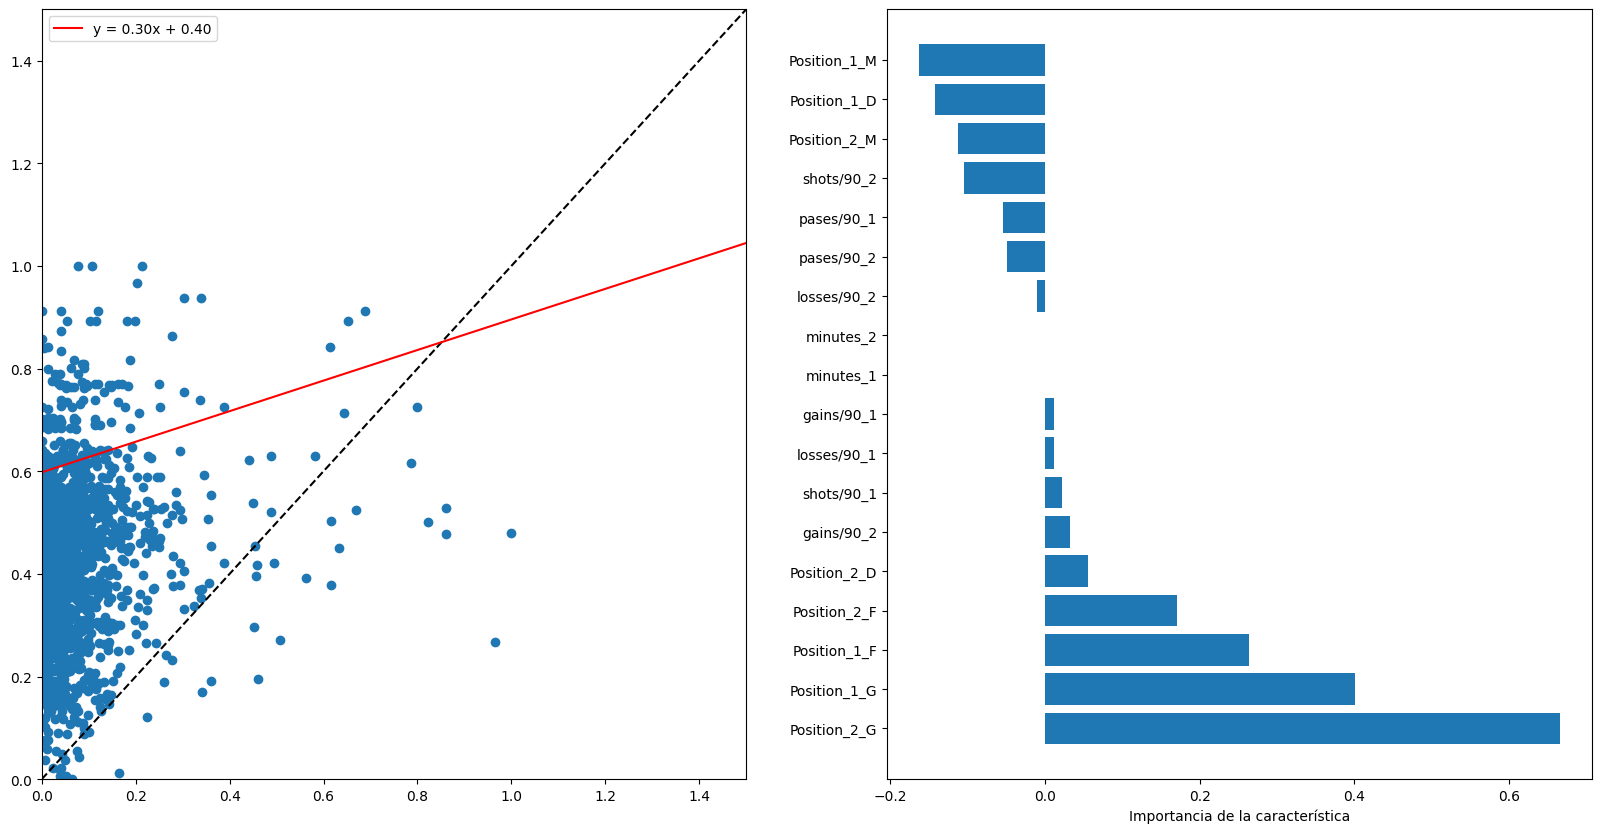

In [93]:

# Crear y entrenar el xgb_modelo
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    booster="gblinear",
)
xgb_model.fit(X_train_encoded, y_train)

# Predecir y evaluar el xgb_modelo
y_pred = xgb_model.predict(X_test_encoded)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# Graficar la importancia de las características y la dispersión de las predicciones
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Limitar el número de características mostradas en la gráfica de importancia de características
# xgb.plot_importance(xgb_model, ax=axs[1], max_num_features=20)

xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]
xgb_columns = X_train_encoded.columns

axs[1].barh(range(X_train_encoded.shape[1]), xgb_importances[xgb_indices], align="center")
axs[1].set_yticks(range(X_train_encoded.shape[1]))
axs[1].set_yticklabels(xgb_columns[xgb_indices])
axs[1].set_xlabel("Importancia de la característica")

# Normalizar los datos para la gráfica de dispersión
y_test_normalized = (y_test - y_test.min()) / (y_test.max() - y_test.min())
y_pred_normalized = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

axs[0].scatter(y_test_normalized, y_pred_normalized)
# plot y = x line
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes, ls="--", c="black")

# plot regression line
y_pred_line = LinearRegression().fit(
    y_test_normalized.values.reshape(-1, 1), y_pred_normalized
)
xgb_slope = y_pred_line.coef_[0]
xgb_intercept = y_pred_line.intercept_

axs[0].plot(
    [0, 1],
    y_pred_line.predict(np.array([0, 1]).reshape(-1, 1)),
    transform=axs[0].transAxes,
    c="red",
    label=f"y = {xgb_slope:.2f}x + {xgb_intercept:.2f}",
)

axs[0].legend()

axs[0].set_xlim(0, 1.5)
axs[0].set_ylim(0, 1.5)
plt.show()

MSE: 0.006440852401365593


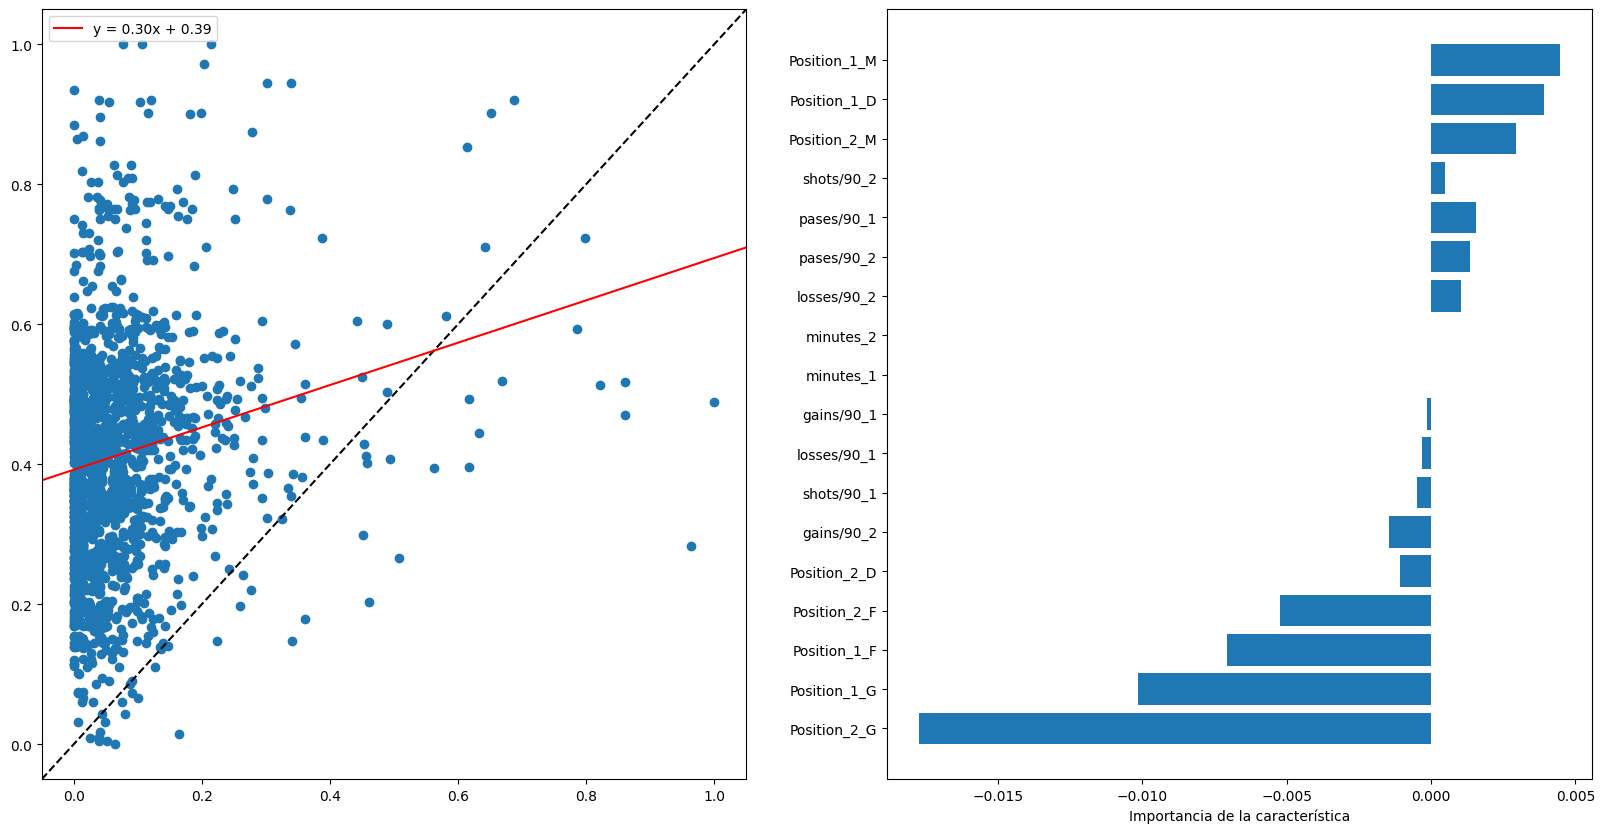

In [94]:
lr_model = LinearRegression()

lr_model.fit(X_train_encoded, y_train)

y_pred = lr_model.predict(X_test_encoded)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

lr_importances = lr_model.coef_
lr_indices = np.argsort(lr_importances)[::-1]

axs[1].barh(range(X_train_encoded.shape[1]), lr_importances[xgb_indices], align="center")
axs[1].set_yticks(range(X_train_encoded.shape[1]))

xgb_columns = X_train_encoded.columns
axs[1].set_yticklabels(xgb_columns[xgb_indices])
axs[1].set_xlabel("Importancia de la característica")

y_test_normalized = (y_test - y_test.min()) / (y_test.max() - y_test.min())
y_pred_normalized = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

axs[0].scatter(y_test_normalized, y_pred_normalized)
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes, ls="--", c="black")

y_pred_line = LinearRegression().fit(
    y_test_normalized.values.reshape(-1, 1), y_pred_normalized
)

xgb_slope = y_pred_line.coef_[0]
xgb_intercept = y_pred_line.intercept_

axs[0].plot(
    [0, 1],
    y_pred_line.predict(np.array([0, 1]).reshape(-1, 1)),
    transform=axs[0].transAxes,
    c="red",
    label=f"y = {xgb_slope:.2f}x + {xgb_intercept:.2f}",
)

axs[0].legend()


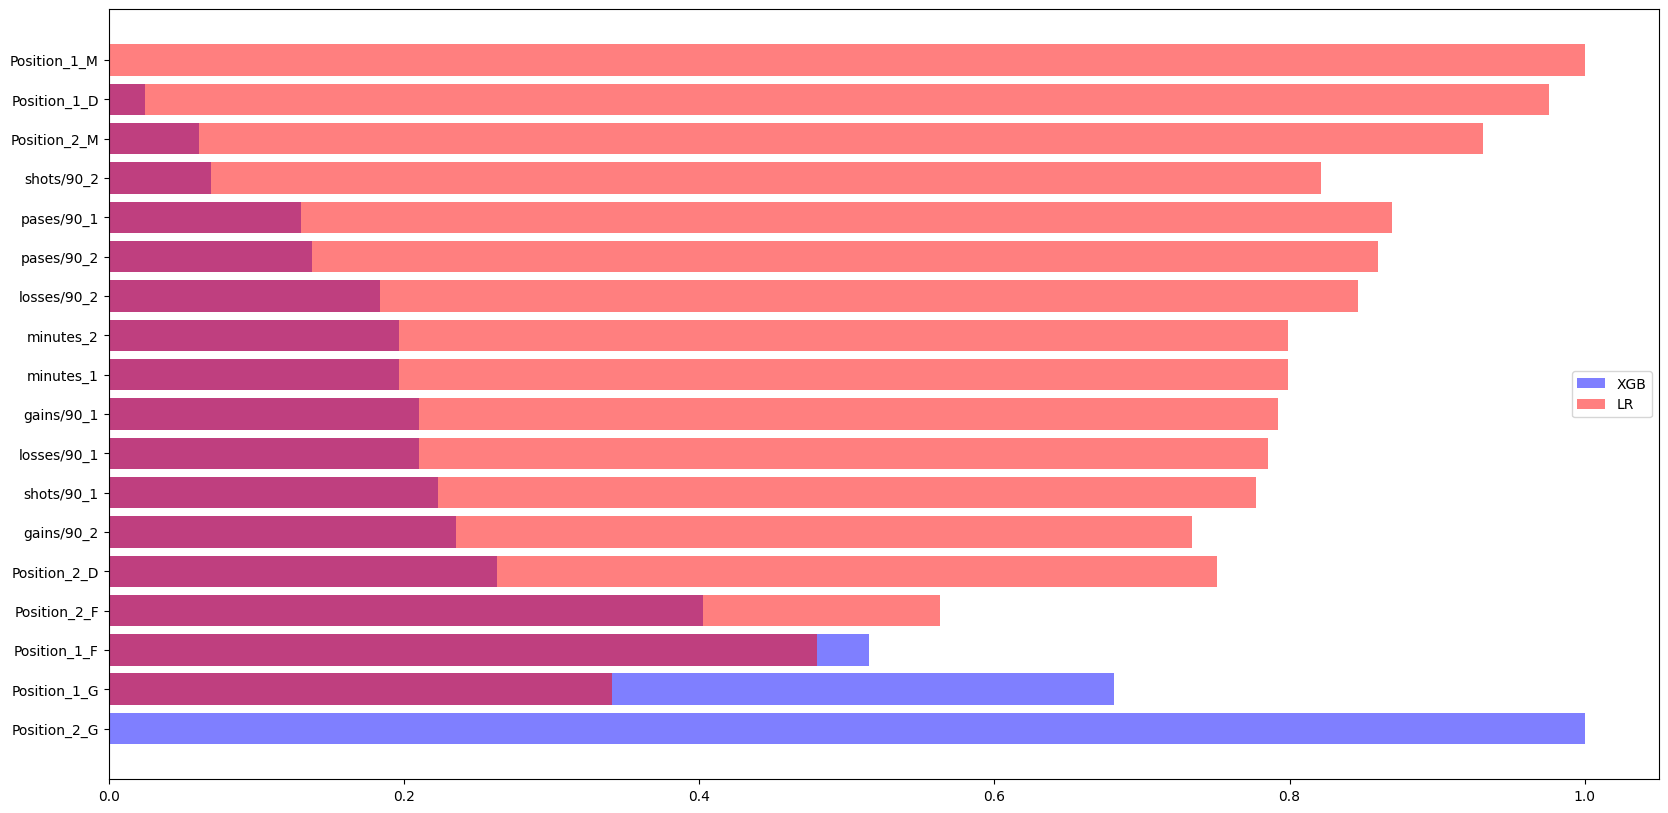

In [95]:
import numpy as np
import matplotlib.pyplot as plt


# Función para normalizar utilizando min-max
def min_max_normalize(values):
    return (values - np.min(values)) / (np.max(values) - np.min(values))


# Normalizar las importancias de las características
xgb_importances_normalized = min_max_normalize(xgb_importances)
lr_importances_normalized = min_max_normalize(lr_importances)

# Plot importance of features for both models over each other
fig, ax = plt.subplots(figsize=(20, 10))

ax.barh(
    range(X_train_encoded.shape[1]),
    xgb_importances_normalized[xgb_indices],
    align="center",
    label="XGB",
    color="blue",
    alpha=0.5,
)

ax.barh(
    range(X_train_encoded.shape[1]),
    lr_importances_normalized[xgb_indices],
    align="center",
    label="LR",
    color="red",
    alpha=0.5,
)

ax.set_yticks(range(X_train_encoded.shape[1]))
ax.set_yticklabels(X_train_encoded.columns[xgb_indices])
ax.legend()
plt.show()